### Lab 6
#### Author: Ceyda Durmaz
#### Date: 12/16/2020
##### Link to GitHub repository: https://github.com/cdurmaz569/Data_Science_I_Lab/tree/master/Lab_6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering

##### Part 1 

In [2]:
# Read in microarray data 
gex = pd.read_csv("NCI60_data.csv", index_col = 0)

# Read in labels
labs = pd.read_csv("NCI60_labs.csv", index_col = 0)

##### Part 2 

43


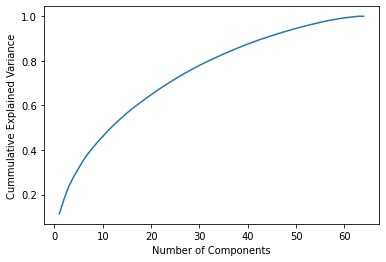

In [3]:
# Scale data
gex_scaled = StandardScaler().fit(gex).transform(gex)

# PCA
pca=PCA();
pca.fit(gex_scaled);

# Variance explained by PCs
pca_var = pca.explained_variance_ratio_

# Cumulative variance explained by PCs
pca_cum = np.cumsum(pca_var)

# Number of PCs explained by 90% of variance
pca_cum_percent90 = np.where(pca_cum >= 0.9)[0][0]
print(pca_cum_percent90)

# Plot scree plot
plt.plot(np.arange(1, len(pca_var) + 1), pca_cum);
plt.xlabel("Number of Components");
plt.ylabel("Cummulative Explained Variance");

There were 64 PCs produced in the analysis. Approximately 43 PCs are required to explain 90% of the variance in the data.

##### Part 3

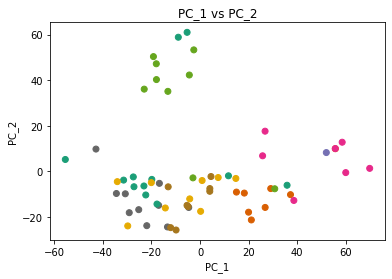

In [4]:
# Collapse dimmensionality
pca_scores = pca.fit_transform(gex_scaled)

# Set Label Encoder
LE = LabelEncoder()

# Plot scores on first versus second PC
plt.scatter(pca_scores[:,0], pca_scores[:,1], 
            c = LE.fit_transform(labs["x"]), 
            cmap = "Dark2"); 
plt.xlabel("PC_1");
plt.ylabel("PC_2");
plt.title("PC_1 vs PC_2");

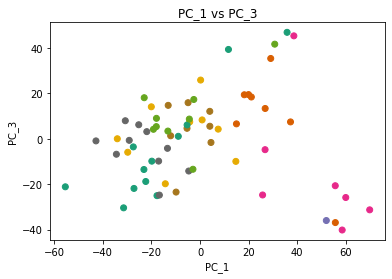

In [5]:
# Plot scores on first versus third PC
plt.scatter(pca_scores[:,0], pca_scores[:,2], 
            c = LE.fit_transform(labs["x"]), 
            cmap = "Dark2"); 
plt.xlabel("PC_1");
plt.ylabel("PC_3");
plt.title("PC_1 vs PC_3");

After dimension reduction, the cancer types appear to cluster better in the PC1 vs PC2 plot than the PC1 vs PC3 plot. PC1 appears to separate the cancer types ok, as can be seen by the different groups of colors (cancer types) across the x-axis in both PC1 vs PC2 plot and PC1 vs PC3 plot. PC2 seems to separate the cancer type represented by light green from the others with a few outliers, while PC3 does not cluster as clear. 

##### Part 4

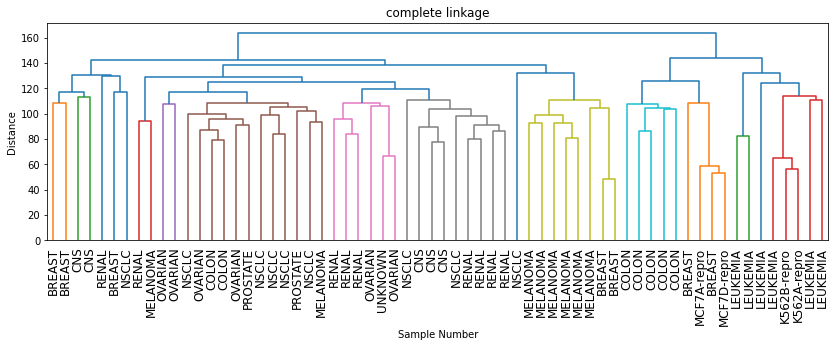

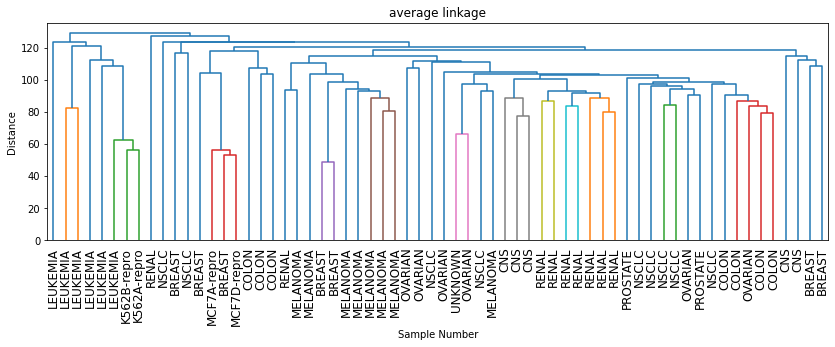

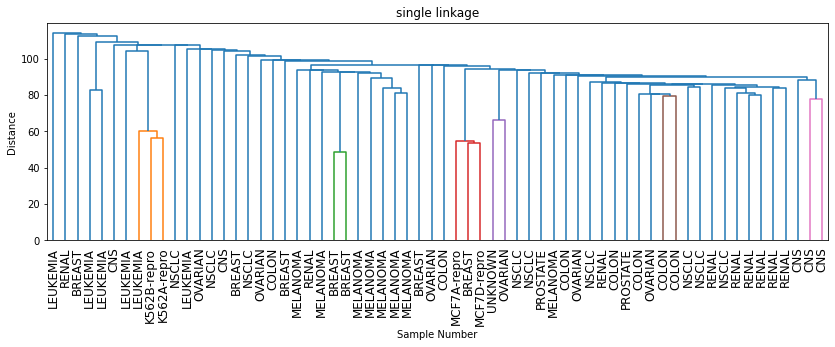

In [6]:
# Visualize dendogram for hierarchical clustering 
## Complete, average, and single linkage 
## Label dendogram with cancer types 
n = 0
for method in ["complete", "average", "single"]: 
    n += 1
    plt.figure(n, figsize = (14,4))
    shc.dendrogram(shc.linkage(gex_scaled, method = method), 
                   labels = np.array(labs["x"]),
                   leaf_font_size = 12);
    plt.xlabel("Sample Number");
    plt.ylabel("Distance");
    plt.title(method + " linkage")

Yes, linkage choice impacts the results. Complete linkage appears to cluster the cancer types the best, which may be due to the method being less susceptible to outliers. Average linkage alos performs well, with all Leukemia and almost all Melanoma and Rnal in close proximity. Single linkage does ok compared to Complete and Average, but has the drawback of producing long thin clusters as it is more susceptible to outliers in the data. 

##### Part 5

In [7]:
# Cluster observations into 4 groups
cluster = AgglomerativeClustering(n_clusters = 4, 
                                  affinity = "euclidean", 
                                  linkage = "complete")
cluster.fit_predict(gex_scaled)

# View labels of first four clusters 
for num in np.unique(cluster.labels_):
    print(np.array(labs["x"])[cluster.labels_ == num])
    print("\n")

['CNS' 'CNS' 'CNS' 'RENAL' 'NSCLC' 'NSCLC' 'RENAL' 'RENAL' 'RENAL' 'RENAL'
 'RENAL' 'RENAL' 'RENAL' 'UNKNOWN' 'OVARIAN' 'MELANOMA' 'PROSTATE'
 'OVARIAN' 'OVARIAN' 'OVARIAN' 'OVARIAN' 'OVARIAN' 'PROSTATE' 'NSCLC'
 'NSCLC' 'NSCLC' 'COLON' 'COLON' 'NSCLC' 'NSCLC' 'NSCLC' 'MELANOMA'
 'BREAST' 'BREAST' 'MELANOMA' 'MELANOMA' 'MELANOMA' 'MELANOMA' 'MELANOMA'
 'MELANOMA']


['LEUKEMIA' 'K562B-repro' 'K562A-repro' 'LEUKEMIA' 'LEUKEMIA' 'LEUKEMIA'
 'LEUKEMIA' 'LEUKEMIA']


['COLON' 'COLON' 'COLON' 'COLON' 'COLON' 'MCF7A-repro' 'BREAST'
 'MCF7D-repro' 'BREAST']


['BREAST' 'CNS' 'CNS' 'BREAST' 'BREAST' 'NSCLC' 'RENAL']




Based on labeling, it is somewhat successful. Both Leukemia and colon cancers appear to somewhat cluster into their own group. 

##### Part 6

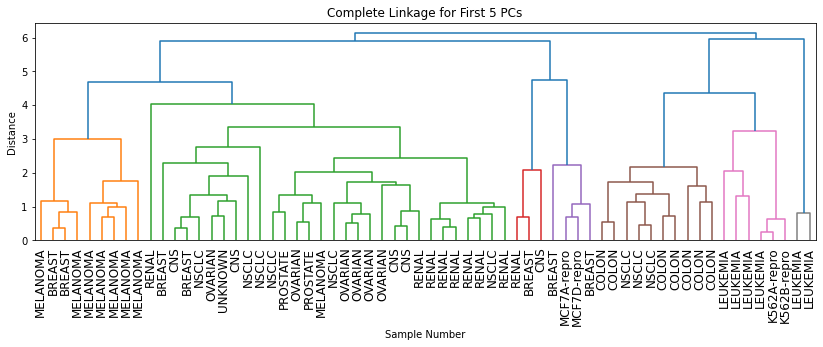

In [8]:
# Scale PCs
pca5 = pca_scores[:,:5]
pca5_scaled = StandardScaler().fit(pca5).transform(pca5)

# Visualize dendogram for hierarchical clustering on first 5 PC scores
plt.figure(figsize = (14, 4))
shc.dendrogram(shc.linkage(pca5_scaled,
                          method = "complete", 
                          optimal_ordering = True),
              labels = np.array(labs["x"]),
              leaf_font_size = 12)
plt.xlabel("Sample Number");
plt.ylabel("Distance");
plt.title("Complete Linkage for First 5 PCs");

Using only the first five PCs allows for a much cleaner clustering, as the cancer types Melanoma, Renal, Colon, and Leukemia cluster well. 